In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

plt.style.use('ggplot')
sns.set_context('talk')
sns.color_palette("hls", 8)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

# Version

In [2]:
print(pd.__version__)

2.2.3


# INFO

In [3]:
df = pd.read_csv('./assets/gapminder.tsv',sep='\t')

df.info()

df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


,count,mean,std,min,25%,50%,75%,max
year,1704.0,1.979500e+03,1.726533e+01,1952.000000,1.965750e+03,1.979500e+03,1.993250e+03,2.007000e+03
lifeExp,1704.0,5.947444e+01,1.291711e+01,23.599000,4.819800e+01,6.071250e+01,7.084550e+01,8.260300e+01
pop,1704.0,2.960121e+07,1.061579e+08,60011.000000,2.793664e+06,7.023596e+06,1.958522e+07,1.318683e+09
gdpPercap,1704.0,7.215327e+03,9.857455e+03,241.165876,1.202060e+03,3.531847e+03,9.325462e+03,1.135231e+05


In [4]:
print(df.shape)
print(type(df))

country = df['country']   # Series
print(type(country))

(1704, 6)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# Print

In [5]:
print(df.head(3).to_string())

print(df.tail(3).to_string())

print(df.sample(3).to_string())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
       country continent  year  lifeExp       pop   gdpPercap
1701  Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702  Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298
        country continent  year  lifeExp       pop    gdpPercap
1529   Thailand      Asia  1977   62.494  44148285  1961.224635
1444      Sudan    Africa  1972   45.083  14597019  1659.652775
58    Argentina  Americas  2002   74.340  38331121  8797.640716


In [6]:
print(f"columns::{df.columns}")
print(f"index::::{df.index}")

# Numpy version
print(df.values)

columns::Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')
index::::RangeIndex(start=0, stop=1704, step=1)
[['Afghanistan' 'Asia' 1952 28.801 8425333 779.4453145]
 ['Afghanistan' 'Asia' 1957 30.332 9240934 820.8530296]
 ['Afghanistan' 'Asia' 1962 31.997 10267083 853.10071]
 ...
 ['Zimbabwe' 'Africa' 1997 46.809 11404948 792.4499603]
 ['Zimbabwe' 'Africa' 2002 39.989 11926563 672.0386227]
 ['Zimbabwe' 'Africa' 2007 43.487 12311143 469.7092981]]


In [7]:
print(df.dtypes)

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object


# Slicing and Indexing

In [8]:
print(df.loc[2] ) # 3rd record

country      Afghanistan
continent           Asia
year                1962
lifeExp           31.997
pop             10267083
gdpPercap      853.10071
Name: 2, dtype: object


In [9]:
print(df.loc[[2,0]])   #3rd and 1st record

       country continent  year  lifeExp       pop   gdpPercap
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
0  Afghanistan      Asia  1952   28.801   8425333  779.445314


In [10]:
try:
    df.loc[-1]
except KeyError as ke:
    print(ke.__repr__())
    print("Negative index won't work in loc")

KeyError(-1)
Negative index won't work in loc


In [11]:
print(df.iloc[[2,-1]])

          country continent  year  lifeExp       pop   gdpPercap
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [12]:
print(df.iloc[-5:-1,:])
print(df.iloc[-5:-1,[1,-1]]) 

       country continent  year  lifeExp       pop   gdpPercap
1699  Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700  Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701  Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702  Zimbabwe    Africa  2002   39.989  11926563  672.038623
     continent   gdpPercap
1699    Africa  706.157306
1700    Africa  693.420786
1701    Africa  792.449960
1702    Africa  672.038623


In [13]:
print(df.loc[:1,:])
print(df.loc[:1,['continent','year']]) 

       country continent  year  lifeExp      pop   gdpPercap
0  Afghanistan      Asia  1952   28.801  8425333  779.445314
1  Afghanistan      Asia  1957   30.332  9240934  820.853030
  continent  year
0      Asia  1952
1      Asia  1957


# Filtering and Subseting

In [14]:
print(df.loc[ df['country']=="Afghanistan" , ["country","year"]])   # RIGHT SIDE comma specify "subset of Dataframe"  # LEFT SIDE condition we want to pull

        country  year
0   Afghanistan  1952
1   Afghanistan  1957
2   Afghanistan  1962
3   Afghanistan  1967
4   Afghanistan  1972
5   Afghanistan  1977
6   Afghanistan  1982
7   Afghanistan  1987
8   Afghanistan  1992
9   Afghanistan  1997
10  Afghanistan  2002
11  Afghanistan  2007


In [15]:
subset = df.loc[:, ['year', 'pop']] # : represent all records
print(subset.shape, subset.columns)

subset =  df.iloc[:, [2, 4]]        #  2,4 represent position of columns
print(subset.shape, subset.columns)

(1704, 2) Index(['year', 'pop'], dtype='object')
(1704, 2) Index(['year', 'pop'], dtype='object')


In [16]:
print(df.loc[(df['country'] == 'United States') & (df['year'] == 1982)])

            country continent  year  lifeExp        pop    gdpPercap
1614  United States  Americas  1982    74.65  232187835  25009.55914


# SQL transformations

In [17]:
print(df.groupby("year")['lifeExp'].agg(['mean','median','min','max','sum','prod']))

           mean   median     min     max         sum           prod
year                                                               
1952  49.057620  45.1355  28.801  72.670  6966.18200  1.564323e+238
1957  51.507401  48.3605  30.332  73.470  7314.05096  2.195431e+241
1962  53.609249  50.8810  31.997  73.680  7612.51336  9.075308e+243
1967  55.678290  53.8250  34.020  74.160  7906.31712  3.017474e+246
1972  57.647386  56.5300  35.400  74.720  8185.92888  5.920396e+248
1977  59.570157  59.6720  31.220  76.110  8458.96236  7.609392e+250
1982  61.533197  62.4415  38.445  77.110  8737.71400  1.109257e+253
1987  63.212613  65.8340  39.906  78.670  8976.19100  6.088937e+254
1992  64.160338  67.7030  23.599  79.360  9110.76800  3.442806e+255
1997  65.014676  69.3940  36.087  80.690  9232.08400  2.304462e+256
2002  65.694923  70.8255  39.193  82.000  9328.67900  7.732724e+256
2007  67.007423  71.9355  39.613  82.603  9515.05400  1.548599e+258


In [18]:
print(type(df.groupby("year")))
print(type(df.groupby("year")["lifeExp"]))


tranformed_df = df.loc[df['year']>2000].groupby(["year", "continent"])[["lifeExp", "gdpPercap", "pop"]].agg([np.mean, np.std])
print(type(tranformed_df))
print(tranformed_df.to_string())

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.SeriesGroupBy'>
<class 'pandas.core.frame.DataFrame'>
                  lifeExp               gdpPercap                         pop              
                     mean       std          mean           std          mean           std
year continent                                                                             
2002 Africa     53.325231  9.586496   2599.385159   2972.651308  1.603315e+07  2.230300e+07
     Americas   72.422040  4.799705   9287.677107   8895.817785  3.399091e+07  6.560155e+07
     Asia       69.233879  8.374595  10174.090397  11150.719203  1.091455e+08  2.767017e+08
     Europe     76.700600  2.922180  21711.732422  11197.355517  1.927413e+07  2.322369e+07
     Oceania    79.740000  0.890955  26938.778040   5301.853680  1.172741e+07  1.105827e+07
2007 Africa     54.806038  9.630781   3089.032605   3618.163491  1.787576e+07  2.491773e+07
     Americas   73.608120  

/tmp/ipykernel_83075/2398318896.py:5: FutureWarning: The provided callable <function mean at 0x704048611760> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tranformed_df = df.loc[df['year']>2000].groupby(["year", "continent"])[["lifeExp", "gdpPercap", "pop"]].agg([np.mean, np.std])
/tmp/ipykernel_83075/2398318896.py:5: FutureWarning: The provided callable <function std at 0x7040486118a0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  tranformed_df = df.loc[df['year']>2000].groupby(["year", "continent"])[["lifeExp", "gdpPercap", "pop"]].agg([np.mean, np.std])
/tmp/ipykernel_83075/2398318896.py:5: FutureWarning: The provided callable <function mean at 0x704048611760> is currently using SeriesGroupBy.mean. In a future version of pandas, the 

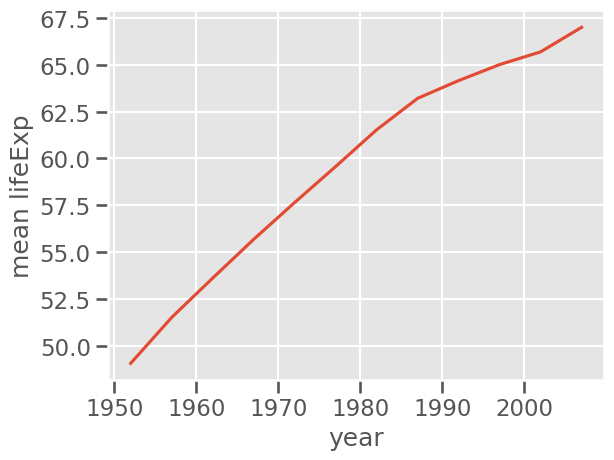

In [19]:
df.groupby(['year'])['lifeExp'].mean().plot(kind='line')
plt.ylabel("mean lifeExp")
plt.show()

/tmp/ipykernel_83075/4164612163.py:1: FutureWarning: The provided callable <function std at 0x7040486118a0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby(['year'])['lifeExp'].agg(np.std).plot(kind='line')


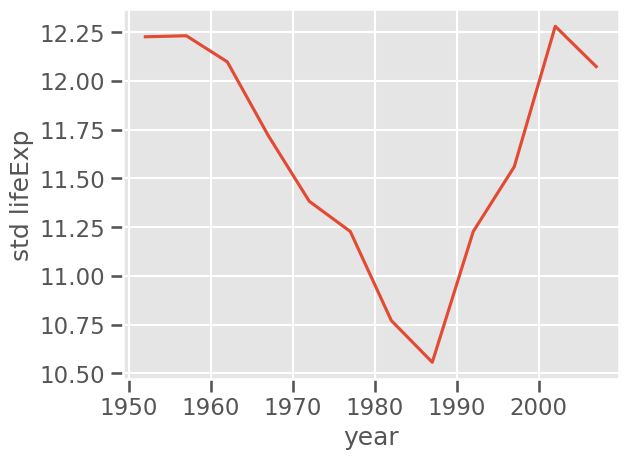

In [20]:
df.groupby(['year'])['lifeExp'].agg(np.std).plot(kind='line')
plt.ylabel("std lifeExp")
plt.show()

In [21]:
df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].agg(np.mean).reset_index()

/tmp/ipykernel_83075/3713066630.py:1: FutureWarning: The provided callable <function mean at 0x704048611760> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].agg(np.mean).reset_index()


,year,continent,lifeExp,gdpPercap
0,1952,Africa,39.135500,1252.572466
1,1952,Americas,53.279840,4079.062552
2,1952,Asia,46.314394,5195.484004
3,1952,Europe,64.408500,5661.057435
4,1952,Oceania,69.255000,10298.085650
5,1957,Africa,41.266346,1385.236062
6,1957,Americas,55.960280,4616.043733
7,1957,Asia,49.318544,5787.732940
8,1957,Europe,66.703067,6963.012816
9,1957,Oceania,70.295000,11598.522455


# Long Tail and Fat Matrix

[tidy data](https://vita.had.co.nz/papers/tidy-data.pdf) << read till section 3 to know about tidy data

In [22]:
pew = pd.read_csv("./assets/pew.csv")
print(pew.shape)

(18, 11)


In [23]:
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [24]:
pew.melt(
    id_vars='religion',  # we don't want to change,
    var_name='income',   # rest of all columns 
    value_name='count'   # their co-responding values
)

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


# Yearly Survey

In [25]:
billboard = pd.read_csv('./assets/billboard.csv')
print(f"shape:: {billboard.shape}")
print(billboard.loc[:,:'wk10'].sample(3).to_string())

print(billboard.columns)


# data scientist need long tail matrix but shape explode

billboard_melt = billboard.melt(
    id_vars=['year','artist','track','time','date.entered'],
    var_name='week',
    value_name='rating'
)

print(billboard_melt.sample(10).to_string())

shape:: (317, 81)
     year        artist           track  time date.entered  wk1   wk2   wk3   wk4   wk5   wk6   wk7   wk8    wk9  wk10
30   2000   Before Dark          Monica  4:04   2000-05-20   95  87.0  80.0  80.0  77.0  87.0  91.0  91.0  100.0   NaN
103  2000        Filter  Take A Picture  4:23   1999-11-27   91  74.0  64.0  52.0  38.0  38.0  34.0  31.0   21.0  19.0
3    2000  3 Doors Down           Loser  4:24   2000-10-21   76  76.0  72.0  69.0  67.0  65.0  55.0  59.0   62.0  61.0
Index(['year', 'artist', 'track', 'time', 'date.entered', 'wk1', 'wk2', 'wk3',
       'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9', 'wk10', 'wk11', 'wk12',
       'wk13', 'wk14', 'wk15', 'wk16', 'wk17', 'wk18', 'wk19', 'wk20', 'wk21',
       'wk22', 'wk23', 'wk24', 'wk25', 'wk26', 'wk27', 'wk28', 'wk29', 'wk30',
       'wk31', 'wk32', 'wk33', 'wk34', 'wk35', 'wk36', 'wk37', 'wk38', 'wk39',
       'wk40', 'wk41', 'wk42', 'wk43', 'wk44', 'wk45', 'wk46', 'wk47', 'wk48',
       'wk49', 'wk50', 'wk51', 'wk52',

In [26]:
billboard_songs = billboard_melt[['year','artist','track','time']]
print(billboard_songs)

       year            artist                    track  time
0      2000             2 Pac  Baby Don't Cry (Keep...  4:22
1      2000           2Ge+her  The Hardest Part Of ...  3:15
2      2000      3 Doors Down               Kryptonite  3:53
3      2000      3 Doors Down                    Loser  4:24
4      2000          504 Boyz            Wobble Wobble  3:35
...     ...               ...                      ...   ...
24087  2000       Yankee Grey     Another Nine Minutes  3:10
24088  2000  Yearwood, Trisha          Real Live Woman  3:55
24089  2000   Ying Yang Twins  Whistle While You Tw...  4:19
24090  2000     Zombie Nation            Kernkraft 400  3:30
24091  2000   matchbox twenty                     Bent  4:12

[24092 rows x 4 columns]


24092 rows huge to store, want somethng storage friendly

In [27]:
print(billboard_songs.drop_duplicates().shape)

(317, 4)


In [28]:
billboard_songs.drop_duplicates(inplace=True)
billboard_songs['id']=range(billboard_songs.shape[0])

/tmp/ipykernel_83075/1781212502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billboard_songs.drop_duplicates(inplace=True)
/tmp/ipykernel_83075/1781212502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billboard_songs['id']=range(billboard_songs.shape[0])


In [29]:
billboard_rating = billboard_melt.merge(billboard_songs,on=['year','artist','track','time'])
billboard_rating

,year,artist,track,time,date.entered,week,rating,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0,0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0,1
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0,2
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0,3
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0,4
...,...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN,312
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN,313
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN,314
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN,315


In [30]:
billboard_rating[['id','time','date.entered','week','rating']]

,id,time,date.entered,week,rating
0,0,4:22,2000-02-26,wk1,87.0
1,1,3:15,2000-09-02,wk1,91.0
2,2,3:53,2000-04-08,wk1,81.0
3,3,4:24,2000-10-21,wk1,76.0
4,4,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...
24087,312,3:10,2000-04-29,wk76,NaN
24088,313,3:55,2000-04-01,wk76,NaN
24089,314,4:19,2000-03-18,wk76,NaN
24090,315,3:30,2000-09-02,wk76,NaN


In [31]:
ebola = pd.read_csv('./assets/country_timeseries.csv')
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
ebola_melt = ebola.melt(id_vars=['Date','Day'],value_name='cases')
ebola_melt

,Date,Day,variable,cases
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [33]:
ebola_melt['variable'].str.split('_',expand=True).rename(columns={
    0:"severity",
    1:'cases'
})

,severity,cases
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea
...,...,...
1947,Deaths,Mali
1948,Deaths,Mali
1949,Deaths,Mali
1950,Deaths,Mali


In [34]:
ebola_melt['seviority'] = ebola_melt['variable'].str.split('_').str.get(0)
ebola_melt['Causes'] = ebola_melt['variable'].str.split('_').str[1]

In [35]:
ebola_melt.drop('variable',axis=1,inplace=True)
ebola_melt

,Date,Day,cases,seviority,Causes
0,1/5/2015,289,2776.0,Cases,Guinea
1,1/4/2015,288,2775.0,Cases,Guinea
2,1/3/2015,287,2769.0,Cases,Guinea
3,1/2/2015,286,NaN,Cases,Guinea
4,12/31/2014,284,2730.0,Cases,Guinea
...,...,...,...,...,...
1947,3/27/2014,5,NaN,Deaths,Mali
1948,3/26/2014,4,NaN,Deaths,Mali
1949,3/25/2014,3,NaN,Deaths,Mali
1950,3/24/2014,2,NaN,Deaths,Mali


In [36]:
weather = pd.read_csv('./assets/weather.csv')
weather

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN


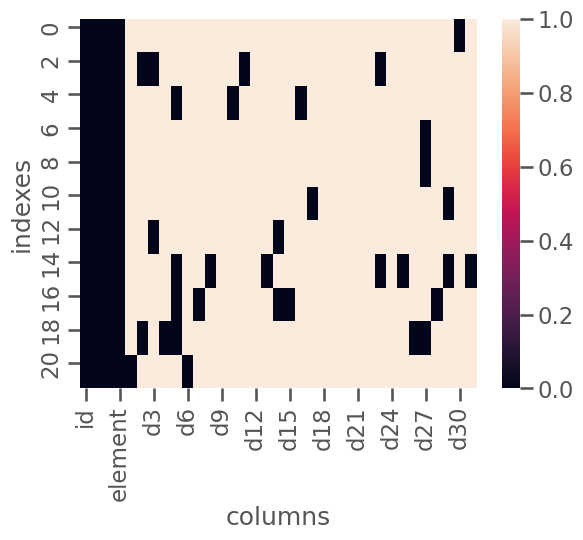

In [37]:
sns.heatmap(weather.isna());
plt.xlabel('columns')
plt.ylabel('indexes');
plt.show()

In [38]:
weather_melt = weather.melt(
    id_vars=['id','year','month','element'],
    var_name='day',
    value_name='temperature'
)
weather_melt

,id,year,month,element,day,temperature
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,d31,NaN
678,MX17004,2010,11,tmax,d31,NaN
679,MX17004,2010,11,tmin,d31,NaN
680,MX17004,2010,12,tmax,d31,NaN


In [39]:
# multi index format

weather_melt.pivot_table(
    index=['id','month','year','day'],
    columns="element",
    values="temperature" ,
    dropna=True
).unstack(0)

element           tmax    tmin
id             MX17004 MX17004
month year day                
1     2010 d30    27.8    14.5
2     2010 d11    29.7    13.4
           d2     27.3    14.4
           d23    29.9    10.7
           d3     24.1    14.4
3     2010 d10    34.5    16.8
           d16    31.1    17.6
           d5     32.1    14.2
4     2010 d27    36.3    16.7
5     2010 d27    33.2    18.2
6     2010 d17    28.0    17.5
           d29    30.1    18.0
7     2010 d3     28.6    17.5
           d14    29.9    16.5
8     2010 d23    26.4    15.0
           d5     29.6    15.8
           d29    28.0    15.3
           d13    29.8    16.5
           d25    29.7    15.6
           d31    25.4    15.4
           d8     29.0    17.3
10    2010 d5     27.0    14.0
           d14    29.5    13.0
           d15    28.7    10.5
           d28    31.2    15.0
           d7     28.1    12.9
11    2010 d2     31.3    16.3
           d5     26.3     7.9
           d27    27.7    14.2
           d26    28.1    12.1
           d4     27.2    12.0
12    2010 d1     29.9    13.8
           d6     27.8    10.5

# Chaining of different methods

In [40]:
df['gdpPercap'].apply([np.mean,np.std,np.var]).values

array([7.21532708e+03, 9.85456167e+03, 9.71123858e+07])

In [41]:
def my_exp(x, e):
    print(f"e={e} and x={x} in my_exp")
    return x ** e

def flip_exp(e, x):
    print(f"e={e} and x={x} in flip_exp")
    return my_exp(x, e)

# create DataFrame
dat = pd.DataFrame({
    'a': [10, 20, 30],
    'b': [20, 30, 40]
})

dat['a'].apply(flip_exp,x=4)

e=10 and x=4 in flip_exp
e=10 and x=4 in my_exp
e=20 and x=4 in flip_exp
e=20 and x=4 in my_exp
e=30 and x=4 in flip_exp
e=30 and x=4 in my_exp


0                1048576
1          1099511627776
2    1152921504606846976
Name: a, dtype: int64

In [42]:
@np.vectorize
def v_avg_2_mod_np(x,y):
    if(x==20):
        return np.nan
    return ((x+y)/2)

In [43]:
%%timeit
v_avg_2_mod_np(dat['a'],dat['b'])

28.7 μs ± 161 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
